In [95]:
pip install pandas numpy seaborn matplotlib.pyplot sklearn.preprocessing sklearn.impute

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

In [97]:
columns_names = ['author', 'author_type', 'location', 'deal_type', 'accommodation_type', 'floors_count', 'rooms_count', 'total_meters', 'price', 'district', 'street', 'house_number', 'underground', 'residential_complex']
df = pd.read_csv("C:/Users/123/Desktop/intensive1-main/1Интенсив/cian_parsing.csv", on_bad_lines="skip", names=columns_names)
df

,author,author_type,location,deal_type,accommodation_type,floors_count,rooms_count,total_meters,price,district,street,house_number,underground,residential_complex
0,Sminex,developer,Москва,sale,flat,12,2,86.1,213680000.0,Хамовники,Фрунзенская набережная,30,Фрунзенская,Клубный город-парк
1,ZIP Realty,real_estate_agent,Москва,sale,flat,20,3,110.7,122000000.0,Пресненский,Костикова,4к1,Улица 1905 года,Lucky
2,ID 18174647,realtor,Москва,sale,flat,31,5,246.7,287323255.0,Очаково-Матвеевское,Нежинская,1к1,Давыдково,Кутузовская Ривьера
3,VESPER,developer,Москва,sale,flat,9,2,104.2,150958800.0,Тверской,1-я Тверская-Ямская,2,Маяковская,Vesper Tverskaya
4,Monumental Group,real_estate_agent,Москва,sale,flat,7,4,160.0,99999000.0,Тверской,Тверская,27С2,Маяковская,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11830,Доступный дом,real_estate_agent,Москва,sale,flat,17,1,35.4,14990000.0,NaN,Эдварда Грига,15,Потапово,NaN
11831,Absolute Premium,developer,Москва,sale,flat,18,1,49.8,60432000.0,Хамовники,NaN,NaN,Воробьёвы горы,Коллекция Лужники ЖК
11832,Оксана Гимишян,realtor,Москва,sale,flat,12,1,38.7,15000000.0,Раменки,Улофа Пальме,3,Минская,NaN
11833,Пионер,developer,Москва,sale,flat,11,1,55.8,52675646.0,Даниловский,NaN,NaN,Павелецкая,Опус ЖК


In [98]:
df = df.drop(['residential_complex', 'house_number', 'deal_type', 'street', 'author', 'author_type', 'accommodation_type'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11835 entries, 0 to 11834
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   location      11835 non-null  object 
 1   floors_count  11835 non-null  int64  
 2   rooms_count   11835 non-null  int64  
 3   total_meters  11835 non-null  float64
 4   price         11757 non-null  float64
 5   district      6076 non-null   object 
 6   underground   11163 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 647.4+ KB


In [99]:
# Подсчет пропусков по каждому столбцу
missing_values = df.isnull().sum()
print("Пропуски в данных:\n", missing_values)

# Процент пропусков в каждом столбце
missing_percent = (df.isnull().sum() / len(df)) * 100
print("\nПроцент пропусков в каждом столбце:\n", missing_percent)

Пропуски в данных:
 location           0
floors_count       0
rooms_count        0
total_meters       0
price             78
district        5759
underground      672
dtype: int64

Процент пропусков в каждом столбце:
 location         0.000000
floors_count     0.000000
rooms_count      0.000000
total_meters     0.000000
price            0.659062
district        48.660752
underground      5.678074
dtype: float64


In [100]:
# Создание признака "цена за квадратный метр"
df['price_per_meter'] = df['price'] / df['total_meters']

In [101]:
import numpy as np

# Удаление строк с отрицательными значениями количества комнат или этажей
df = df[(df['rooms_count'] >= 0) & (df['floors_count'] >= 0)]

# Рассчитываем IQR для 'price_per_meter'
Q1 = df['price_per_meter'].quantile(0.25)
Q3 = df['price_per_meter'].quantile(0.75)
IQR = Q3 - Q1

# Фильтруем выбросы по правилу 1.5 * IQR
df = df[(df['price_per_meter'] >= Q1 - 0.6 * IQR) & (df['price_per_meter'] <= Q3 + 0.6 * IQR)]

# Заменяем оставшиеся аномальные значения на NaN (например, цены, превышающие верхний порог)
df['price_per_meter'] = np.where(df['price_per_meter'] > 1e8, np.nan, df['price_per_meter'])

# Находим числовые столбцы
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Заполняем NaN медианой в числовых столбцах
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())


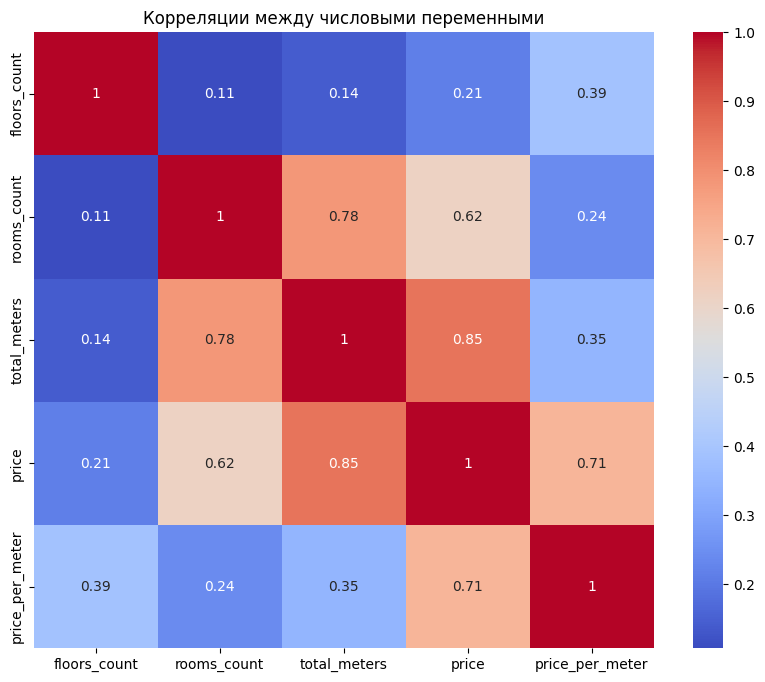

In [102]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Корреляции между числовыми переменными')
plt.show()

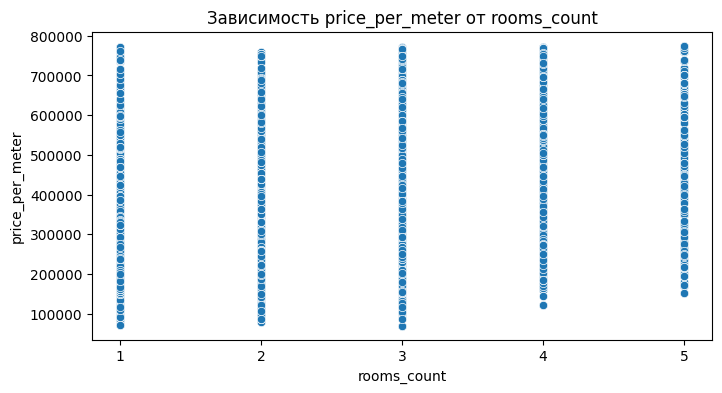

In [103]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x='rooms_count', y='price_per_meter')
plt.title('Зависимость price_per_meter от rooms_count')
plt.xticks(range(int(df['rooms_count'].min()), int(df['rooms_count'].max()) + 1))
plt.show()


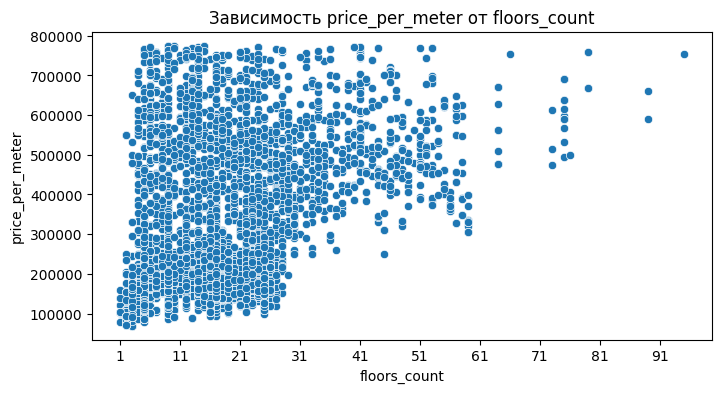

In [104]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x='floors_count', y='price_per_meter')
plt.title('Зависимость price_per_meter от floors_count')
plt.xticks(range(int(df['floors_count'].min()), int(df['floors_count'].max()) + 1, 10))  # Используем шаг 5
plt.show()


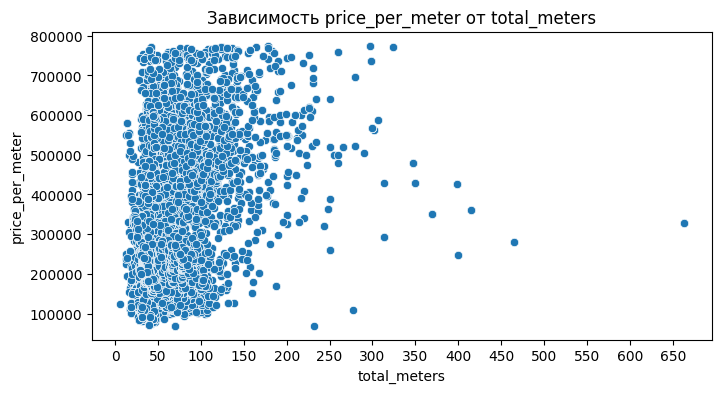

In [105]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x='total_meters', y='price_per_meter')
plt.title('Зависимость price_per_meter от total_meters')
plt.xticks(np.arange(0, df['total_meters'].max() + 1, 50))  # Шаг 20 для удобства
plt.show()


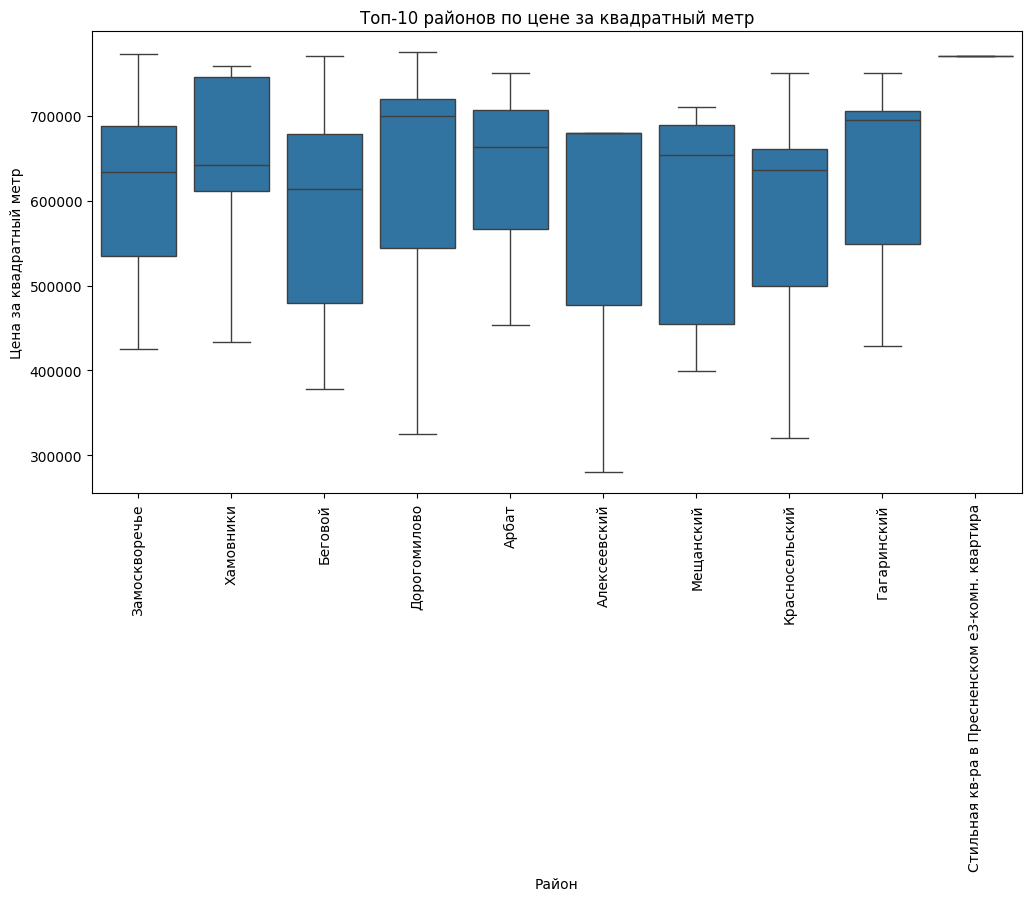

In [106]:
# Получаем топ-10 районов по медианной цене за квадратный метр
top_districts = df.groupby('district')['price_per_meter'].median().nlargest(10).index
filtered_df = df[df['district'].isin(top_districts)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df, x='district', y='price_per_meter')
plt.xticks(rotation=90)
plt.title('Топ-10 районов по цене за квадратный метр')
plt.xlabel('Район')
plt.ylabel('Цена за квадратный метр')
plt.show()


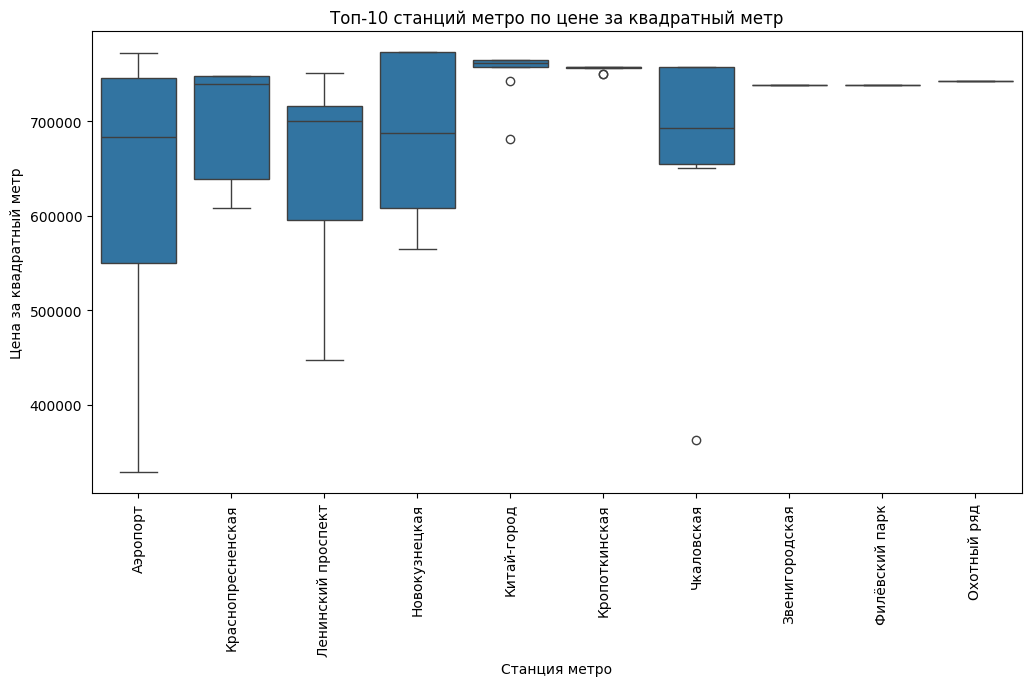

In [107]:
# Получаем топ-10 станций метро по медианной цене за квадратный метр
top_underground = df.groupby('underground')['price_per_meter'].median().nlargest(10).index
filtered_df = df[df['underground'].isin(top_underground)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df, x='underground', y='price_per_meter')
plt.xticks(rotation=90)
plt.title('Топ-10 станций метро по цене за квадратный метр')
plt.xlabel('Станция метро')
plt.ylabel('Цена за квадратный метр')
plt.show()